# Importing Libraries

The code snippet imports several libraries required for data processing, machine learning, and deep learning.

1. `itertools.chain` and `itertools.combinations`:
   - These functions from the `itertools` module are imported to handle iterable combinations.

2. `pandas`:
   - The `pandas` library is imported as `pd` to provide data manipulation and analysis capabilities.

3. `numpy`:
   - The `numpy` library is imported as `np` to support numerical operations and array manipulation.

4. `yfinance`:
   - The `yfinance` library is imported as `yf` to fetch financial market data from Yahoo Finance.

5. `sklearn.preprocessing.StandardScaler`:
   - The `StandardScaler` class from the `sklearn.preprocessing` module is imported to standardize features by removing the mean and scaling to unit variance.

6. `sklearn.model_selection.train_test_split` and `sklearn.model_selection.cross_val_score`:
   - These functions from the `sklearn.model_selection` module are imported to perform data splitting for training and testing, as well as cross-validation.

7. `sklearn.linear_model.LogisticRegression`:
   - The `LogisticRegression` class from the `sklearn.linear_model` module is imported to create a logistic regression model.

8. `sklearn.metrics`:
   - The `sklearn.metrics` module is imported as `metrics` to provide various evaluation metrics for model performance.

9. `sklearn.metrics.accuracy_score`, `sklearn.metrics.precision_score`, `sklearn.metrics.recall_score`, `sklearn.metrics.f1_score`, `sklearn.metrics.roc_auc_score`, `sklearn.metrics.confusion_matrix`:
   - These functions from the `sklearn.metrics` module are imported to calculate various evaluation metrics such as accuracy, precision, recall, F1 score, ROC AUC score, and confusion matrix.

10. `sklearn.impute.SimpleImputer`:
    - The `SimpleImputer` class from the `sklearn.impute` module is imported to handle missing values in the data.

11. `tensorflow.keras.models.Sequential`, `tensorflow.keras.layers.LSTM`, `tensorflow.keras.layers.Dense`, `tensorflow.keras.layers.Dropout`, `tensorflow.keras.layers.BatchNormalization`:
    - These classes from the `tensorflow.keras.models` and `tensorflow.keras.layers` modules are imported to build a sequential model with LSTM layers, dense layers, dropout layers, and batch normalization layers.

12. `tensorflow.keras.optimizers.Adam`:
    - The `Adam` class from the `tensorflow.keras.optimizers` module is imported to define the Adam optimizer for model training.

By importing these libraries, the code snippet prepares the necessary tools for data processing, machine learning, and deep learning tasks.

Please note that you may need to install some of these libraries using the appropriate package manager before executing this code.

In [1]:
# Import libraries
from itertools import chain, combinations
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

# Downloading Cryptocurrency Data

To download data for a specific cryptocurrency, the following code snippet utilizes the `yfinance` library.

In [2]:
# download data of the cryptocurrency

df_xmr = yf.download(tickers="XMR-USD", period="max", interval="1d", start="2023-01-01", end="2023-10-09")

[*********************100%%**********************]  1 of 1 completed


In [3]:
# show the downloaded data
df_xmr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,147.309662,148.931030,146.437485,148.576935,148.576935,36453347
2023-01-02,148.582184,149.623535,147.943558,147.943558,147.943558,47050925
2023-01-03,147.933929,149.027832,147.628860,148.487930,148.487930,48662135
2023-01-04,148.466995,152.488983,148.342621,150.743652,150.743652,83915181
2023-01-05,150.790253,155.921738,150.769043,155.921738,155.921738,78049428


# Data Manipulation and Feature Engineering

This code snippet demonstrates data manipulation and feature engineering steps performed on the downloaded cryptocurrency data.

1. Calculating the Actual Class Labels:
   - The code compares the closing prices of the "XMR-USD" cryptocurrency from January 4, 2023, onwards with the closing prices between January 3, 2023, and October 7, 2023.
   - The comparison is done element-wise, and the resulting boolean values are converted to binary values (0 or 1) using `astype(int)`.
   - The calculated class labels representing price increase or decrease are stored in the `actual_class` variable.

2. Dropping a Specific Date:
   - The code removes a specific date, "2023-10-08", from the `df_xmr` dataframe.
   - This operation eliminates the corresponding row from the dataframe.

3. Creating a New Feature: "Price increase (in the next day)":
   - The code adds a new feature called "Price increase (in the next day)" to the `df_xmr` dataframe.
   - The feature is populated with the values from the `actual_class` variable, representing the price increase (1) or decrease (0) in the subsequent day.

In [4]:
actual_class = (
    (df_xmr.loc["2023-01-04":, "Close"].to_numpy() > df_xmr.loc["2023-01-03":"2023-10-07", "Close"]).astype(int)
)
df_xmr = df_xmr.drop("2023-10-08")
df_xmr["Price increase (in the next day)"] = actual_class

# Splitting the Data into Training, Validation, and Test Sets

The code splits the data into training, validation, and test sets to evaluate the model's performance and assess its generalizability. The `train_test_split` function from the `sklearn.model_selection` module is used for this purpose.

1. Initial Split:
   - The `df_xmr` dataframe is initially split into two parts: `train_data` and `test_data`.
   - The `test_data` portion is 20% of the original data, while the `train_data` portion contains the remaining 80% of the data.

2. Further Splitting:
   - The `train_data` portion is further split into two parts: `train_data` and `val_data`.
   - The `val_data` portion is also 20% of the `train_data`, while the `train_data` retains the remaining 80% of the data.

By splitting the data into training, validation, and test sets, it allows for different stages of model development and evaluation:
- The `train_data` set is used for training the model.
- The `val_data` set is utilized for hyperparameter tuning and assessing the model's performance.
- The `test_data` set serves as an independent dataset to evaluate the final model's generalization ability and performance.

Please note that setting `shuffle=False` ensures that the data is split sequentially, maintaining the temporal order of the data. This can be important in scenarios such as time-series analysis or any other case where the order of the data is significant.

In [5]:
# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(df_xmr, test_size=0.2, shuffle=False, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, shuffle=False, random_state=42)

# Defining Feature Columns and Target Variable

The code snippet defines the feature columns and target variable for the model training and prediction.

1. Feature Columns:
   - The `feature_cols` list specifies the names of the columns from the dataset that will serve as input features for the model.
   - In this case, the feature columns include `'Open'`, `'High'`, `'Low'`, `'Close'`, `'Adj Close'`, and `'Volume'`.

2. Target Variable:
   - The `target_col` variable represents the target variable or the column that the model aims to predict.
   - In this case, the target variable is `'Price increase (in the next day)'`.

By defining the feature columns and target variable, the code establishes which features will be used as inputs and which column the model will predict during the training and evaluation process.



In [6]:
# Define feature columns and target variable
feature_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
target_col = 'Price increase (in the next day)'

# Splitting Features and Target Variable for Training, Validation, and Test Sets

The code snippet splits the features and target variable into separate variables for the training, validation, and test sets. This step is crucial for preparing the data for model training and evaluation.

1. Training Set:
   - The `X_train` variable contains the features for the training set.
   - The features are obtained from the `train_data` dataframe using the specified `feature_cols`.
   - The `y_train` variable represents the corresponding target variable for the training set.
   - The target variable is obtained from the `train_data` dataframe using the specified `target_col`.

2. Validation Set:
   - The `X_val` variable contains the features for the validation set.
   - The features are obtained from the `val_data` dataframe using the specified `feature_cols`.
   - The `y_val` variable represents the corresponding target variable for the validation set.
   - The target variable is obtained from the `val_data` dataframe using the specified `target_col`.

3. Test Set:
   - The `X_test` variable contains the features for the test set.
   - The features are obtained from the `test_data` dataframe using the specified `feature_cols`.
   - The `y_test` variable represents the corresponding target variable for the test set.
   - The target variable is obtained from the `test_data` dataframe using the specified `target_col`.

By splitting the features and target variable for each set, the code prepares the data in separate variables for model training and evaluation on the training, validation, and test sets.



In [7]:
# Split features and target variable for training, validation, and test sets
X_train, y_train = train_data[feature_cols], train_data[target_col]
X_val, y_val = val_data[feature_cols], val_data[target_col]
X_test, y_test = test_data[feature_cols], test_data[target_col]

# Handling Missing Values in the Features and Target Variables

The code snippet handles missing values in the features and target variables using the `SimpleImputer` class from the `sklearn.impute` module.

1. Creating an Imputer:
   - An instance of the `SimpleImputer` class is created with the `strategy` parameter set to `"mean"`.
   - The `"mean"` strategy replaces missing values with the mean of the non-missing values in the respective column.

2. Handling Missing Values:
   - The missing values in the training set, `X_train`, are handled by fitting the imputer on the training data using the `fit_transform()` method.
   - The missing values in the validation set, `X_val`, are handled by transforming the validation data using the `transform()` method.
   - The missing values in the test set, `X_test`, are also handled by transforming the test data using the `transform()` method.

By applying the `SimpleImputer` with the mean strategy, the code replaces missing values in the features with the mean of the non-missing values in each respective column.



In [8]:
# Handle missing values in the features and target variables
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

The provided code snippet scales the features using the `StandardScaler` from the `sklearn.preprocessing` module. 

The `StandardScaler` is a preprocessing class used to standardize features by removing the mean and scaling to unit variance. This normalization technique is commonly applied to ensure that all features have a similar scale, which can be beneficial for many machine learning algorithms.

The code performs the following steps:

1. A `StandardScaler` object is created and assigned to the variable `scaler`.
2. The `fit_transform()` method is called on the `scaler` object with `X_train` as the input. This step fits the scaler to the training data and then transforms it.
3. The `transform()` method is called on the `scaler` object with `X_val` and `X_test` as inputs. This step applies the previously fitted scaler to transform the validation and test data.

By executing these steps, the code scales the features of the `X_train`, `X_val`, and `X_test` datasets using the `StandardScaler`.

Scaling the features is often necessary to ensure that they are on a similar scale, which can improve the performance of machine learning models that rely on distance-based calculations or when using optimization algorithms that are sensitive to feature scales.

Please note that before scaling the features, make sure that the data is in a numerical format and that the features are appropriately prepared for scaling.

In [9]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Handling Missing Values in the Target Variable

The code snippet handles missing values in the target variable using the `SimpleImputer` class from the `sklearn.impute` module.

1. Creating an Imputer:
   - An instance of the `SimpleImputer` class is created with the `strategy` parameter set to `"most_frequent"`.
   - The `"most_frequent"` strategy replaces missing values with the most frequent value in the respective column.

2. Handling Missing Values:
   - Missing values in the training set target variable, `y_train`, are handled by fitting the imputer on the training target data using the `fit_transform()` method.
   - Missing values in the validation set target variable, `y_val`, are handled by transforming the validation target data using the `transform()` method.
   - Missing values in the test set target variable, `y_test`, are also handled by transforming the test target data using the `transform()` method.

By applying the `SimpleImputer` with the most frequent strategy, the code replaces missing values in the target variable with the most frequent value in the respective column.

Handling missing values in the target variable is important to ensure that the data is complete and suitable for model training and evaluation.

In [10]:
# Handle missing values in the target variable
imputer_target = SimpleImputer(strategy="most_frequent")
y_train = imputer_target.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val = imputer_target.transform(y_val.values.reshape(-1, 1)).ravel()
y_test = imputer_target.transform(y_test.values.reshape(-1, 1)).ravel()

The code snippet reshapes the features into a 3D format `(samples, timesteps, features)`. This reshaping is commonly required when working with certain types of deep learning models, such as recurrent neural networks (RNNs) or LSTM (Long Short-Term Memory) models.

The code performs the following steps:

1. Reshaping `X_train`:
   - The `np.reshape()` function from the `numpy` library is used to reshape `X_train`.
   - The shape of `X_train` is `(X_train.shape[0], 1, X_train.shape[1])`, where:
     - `X_train.shape[0]` represents the number of samples.
     - `1` represents the number of timesteps.
     - `X_train.shape[1]` represents the number of features.
   - This reshaping converts `X_train` into a 3D array.

2. Reshaping `X_val`:
   - The same approach is applied to reshape `X_val`.
   - The shape of `X_val` becomes `(X_val.shape[0], 1, X_val.shape[1])`.

3. Reshaping `X_test`:
   - Similarly, `X_test` is reshaped using the same approach.
   - The shape of `X_test` becomes `(X_test.shape[0], 1, X_test.shape[1])`.

By executing these steps, the code reshapes the features of `X_train`, `X_val`, and `X_test` into a 3D format, where the dimensions represent samples, timesteps, and features, respectively.

Please note that before reshaping the features, ensure that the data is appropriately prepared and preprocessed for the intended deep learning model.

In [11]:
# Reshape features into 3D format (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

The code snippet defines an LSTM (Long Short-Term Memory) model using the Keras framework.

The code performs the following steps to define the LSTM model:

1. Creating the Model:
   - An instance of the `Sequential` class is created and assigned to the variable `model`. The `Sequential` class represents a linear stack of layers in the neural network.

2. Adding LSTM Layers:
   - The first LSTM layer is added to the model using the `model.add()` method.
   - The layer has 128 units (neurons) and is configured to return sequences using `return_sequences=True`.
   - The `input_shape` parameter is set to `(X_train.shape[1], X_train.shape[2])`, which corresponds to the shape of the input data.

3. Adding Dropout and Batch Normalization:
   - After the first LSTM layer, a Dropout layer with a rate of 0.2 is added using `model.add(Dropout(0.2))`. Dropout helps prevent overfitting by randomly setting a fraction of input units to 0 during training.
   - A Batch Normalization layer is added using `model.add(BatchNormalization())`. Batch Normalization normalizes the activations of the previous layer, helping stabilize the learning process.

4. Adding the Second LSTM Layer:
   - Another LSTM layer is added to the model using `model.add(LSTM(64))`. This layer has 64 units.
   - Similarly, a Dropout layer with a rate of 0.2 and a Batch Normalization layer are added after the second LSTM layer.

5. Adding the Output Layer:
   - The final layer is a Dense layer with 1 unit and a sigmoid activation function, added using `model.add(Dense(1, activation='sigmoid'))`. This layer produces the output of the model.

By executing these steps, the code defines an LSTM model with two LSTM layers, dropout layers, batch normalization layers, and a dense output layer. The architecture and hyperparameters of the LSTM model can be modified based on the specific requirements of the problem and the dataset being used.

In [12]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

The code snippet compiles the LSTM model by specifying the optimizer, loss function, and evaluation metrics.

The code performs the following steps to compile the model:

1. Specifying the Optimizer:
   - An instance of the Adam optimizer is created and assigned to the variable `optimizer`. The `Adam` optimizer is a popular optimization algorithm used for training deep learning models.
   - The learning rate of the optimizer is set to `0.001` using the `learning_rate` parameter.

2. Specifying the Loss Function:
   - The loss function for the model is specified as `'binary_crossentropy'` using the `loss` parameter. This loss function is commonly used for binary classification problems.

3. Specifying Evaluation Metrics:
   - The evaluation metric for the model is specified as `['accuracy']` using the `metrics` parameter. This metric measures the accuracy of the model during training and evaluation.


In [13]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

The code snippet trains the LSTM model using the provided training data.

The code performs the following steps to train the model:

1. Training Data:
   - The training data is passed to the `model.fit()` method.
   - `X_train` represents the input features of the training data.
   - `y_train` represents the target labels of the training data.

2. Training Parameters:
   - The `epochs` parameter is set to `50`, indicating the number of times the model will iterate over the entire training dataset during training.
   - The `batch_size` parameter is set to `32`, specifying the number of samples that will be propagated through the network at once.
   - The `verbose` parameter is set to `1`, which determines the verbosity mode. In this case, `1` indicates that progress updates will be displayed during training.

3. Validation Data:
   - The validation data is provided using the `validation_data` parameter.
   - `X_val` represents the input features of the validation data.
   - `y_val` represents the target labels of the validation data.

By executing these steps, the code trains the LSTM model using the provided training data, with the specified training parameters and validation data. The model will iterate over the training dataset for 50 epochs, updating its weights based on the defined loss function and optimizer. The training progress will be displayed due to the verbose mode set to 1.

In [14]:
# Train the LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
6/6 [==============================] - 5s 196ms/step - loss: 0.8029 - accuracy: 0.4972 - val_loss: 0.6926 - val_accuracy: 0.5111
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 0.7471 - accuracy: 0.5475 - val_loss: 0.6925 - val_accuracy: 0.5111
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.7342 - accuracy: 0.5363 - val_loss: 0.6933 - val_accuracy: 0.5111
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.6671 - accuracy: 0.6313 - val_loss: 0.6937 - val_accuracy: 0.5111
Epoch 5/50
6/6 [==============================] - 0s 14ms/step - loss: 0.6891 - accuracy: 0.5642 - val_loss: 0.6943 - val_accuracy: 0.5111
Epoch 6/50
6/6 [==============================] - 0s 13ms/step - loss: 0.7585 - accuracy: 0.5642 - val_loss: 0.6943 - val_accuracy: 0.5111
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.7376 - accuracy: 0.5810 - val_loss: 0.6950 - val_accuracy: 0.5111
Epoch 8/50
6/6 [==========

The code snippet makes predictions on the validation set using the trained LSTM model.

The code performs the following steps to make predictions:

1. Prediction Probabilities:
   - The `model.predict()` method is used to obtain the predicted probabilities for the validation set.
   - `X_val` represents the input features of the validation set.
   - The predicted probabilities are assigned to the variable `val_probabilities`.

2. Thresholding and Prediction Conversion:
   - A threshold of `0.5` is applied to the predicted probabilities using `(val_probabilities > 0.5)`. This operation creates a binary array where values above the threshold are `True` and values below or equal to the threshold are `False`.
   - The `.astype(int)` method is used to convert the boolean array into integers, resulting in binary predictions.
   - The binary predictions are assigned to the variable `val_predictions`.

By executing these steps, the code generates predictions on the validation set using the trained LSTM model. The predicted probabilities and binary predictions are obtained and stored in the variables `val_probabilities` and `val_predictions`, respectively.

Please note that the code assumes the prior training of the LSTM model and the availability of the validation set (`X_val`) for making predictions.

In [15]:
# Make predictions on the validation set
val_probabilities = model.predict(X_val)
val_predictions = (val_probabilities > 0.5).astype(int)

2/2 [==============================] - 1s 5ms/step


# Evaluating Model Performance on the Validation Set

The code snippet evaluates the performance of the trained random forest model on the validation set by calculating various evaluation metrics.

1. Accuracy:
   - The `accuracy_score()` function from the `sklearn.metrics` module is used to calculate the accuracy of the model's predictions on the validation set.
   - The `accuracy_score()` function takes the actual target values, `y_val`, and the predicted target values, `val_predictions`, as input and returns the accuracy score.

2. Precision:
   - The `precision_score()` function is used to calculate the precision of the model's predictions on the validation set.
   - The `precision_score()` function takes the actual target values, `y_val`, and the predicted target values, `val_predictions`, as input and returns the precision score.

3. Recall:
   - The `recall_score()` function is used to calculate the recall of the model's predictions on the validation set.
   - The `recall_score()` function takes the actual target values, `y_val`, and the predicted target values, `val_predictions`, as input and returns the recall score.

4. F1 Score:
   - The `f1_score()` function is used to calculate the F1 score of the model's predictions on the validation set.
   - The `f1_score()` function takes the actual target values, `y_val`, and the predicted target values, `val_predictions`, as input and returns the F1 score.

5. AUC-ROC Score:
   - The `roc_auc_score()` function is used to calculate the AUC-ROC score of the model's predictions on the validation set.
   - The `roc_auc_score()` function takes the actual target values, `y_val`, and the predicted target values, `val_predictions`, as input and returns the AUC-ROC score.

6. Confusion Matrix:
   - The `confusion_matrix()` function is used to calculate the confusion matrix of the model's predictions on the validation set.
   - The `confusion_matrix()` function takes the actual target values, `y_val`, and the predicted target values, `val_predictions`, as input and returns the confusion matrix.

By executing these steps, the code evaluates the performance of the trained random forest model on the validation set using various evaluation metrics.


In [16]:
# Evaluate model performance on the validation set
accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)
auc = roc_auc_score(y_val, val_probabilities)
confusion = confusion_matrix(y_val, val_predictions)

In [17]:
# Print evaluation metrics and confusion matrix
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC: {auc}')
print('Confusion Matrix:')
print(confusion)


Accuracy: 0.5111111111111111
Precision: 0.5185185185185185
Recall: 0.6086956521739131
F1 Score: 0.5599999999999999
AUC: 0.5158102766798419
Confusion Matrix:
[[ 9 13]
 [ 9 14]]


The code snippet makes predictions on the test set using the trained LSTM model and evaluates the model's performance.

The code performs the following steps:

1. Prediction Probabilities:
   - The `model.predict()` method is used to obtain the predicted probabilities for the test set.
   - `X_test` represents the input features of the test set.
   - The predicted probabilities are assigned to the variable `test_probabilities`.

2. Thresholding and Prediction Conversion:
   - A threshold of `0.5` is applied to the predicted probabilities using `(test_probabilities > 0.5)`. This operation creates a binary array where values above the threshold are `True` and values below or equal to the threshold are `False`.
   - The `.astype(int)` method is used to convert the boolean array into integers, resulting in binary predictions.
   - The binary predictions are assigned to the variable `test_predictions`.

By executing these steps, the code generates predictions on the test set using the trained LSTM model. The predicted probabilities and binary predictions are obtained and stored in the variables `test_probabilities` and `test_predictions`, respectively.

The code then proceeds to evaluate the model's performance on the test set using various evaluation metrics:

3. Evaluation Metrics:
   - The `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, and `roc_auc_score` functions are used to calculate the accuracy, precision, recall, F1 score, and AUC (Area Under the Curve), respectively.
   - These evaluation metrics are calculated by comparing the ground truth labels (`y_test`) with the predicted binary labels (`test_predictions`).

4. Confusion Matrix:
   - The `confusion_matrix` function is used to calculate the confusion matrix, providing a summary of the true positive, false positive, true negative, and false negative predictions.

Finally, the evaluation metrics and the confusion matrix are printed to assess the model's performance on the test set.


In [18]:
# Make predictions on the test set
test_probabilities = model.predict(X_test)
test_predictions = (test_probabilities > 0.5).astype(int)

# Evaluate model performance on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
test_auc = roc_auc_score(y_test, test_probabilities)
test_confusion = confusion_matrix(y_test, test_predictions)

# Print evaluation metrics and confusion matrix for the test set
print('\nTest Set Performance:')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')
print(f'Test AUC: {test_auc}')
print('Test Confusion Matrix:')
print(test_confusion)

2/2 [==============================] - 0s 3ms/step

Test Set Performance:
Test Accuracy: 0.5714285714285714
Test Precision: 0.5849056603773585
Test Recall: 0.9393939393939394
Test F1 Score: 0.7209302325581395
Test AUC: 0.5243741765480896
Test Confusion Matrix:
[[ 1 22]
 [ 2 31]]


In [19]:
test_predictions

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

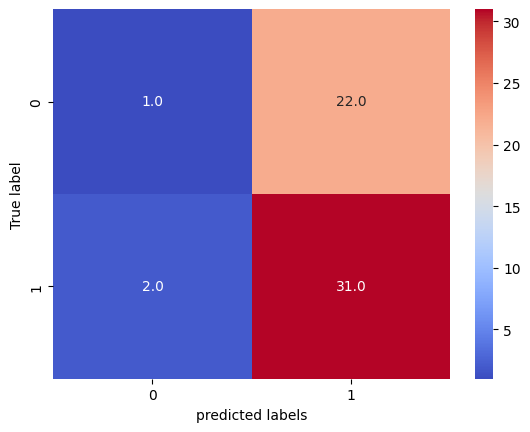

In [20]:
# Create a heatmap using Seaborn
sns.heatmap(test_confusion, cmap='coolwarm', annot=True, fmt=".1f")

# Add labels and title
plt.xlabel('predicted labels')
plt.ylabel('True label')

# Display the plot
plt.show()